In [259]:
#dataset 2: Boston public library daily active user counts
#link to the dataset: https://data.boston.gov/dataset/boston-public-library-daily-active-user-counts
# This data contains the number of users per day from 28 October 2014 to 1 March 2016. 
# It has a date-time attribute and a users attribute. 
# Some questions which can be answered are:
#Minimum and maximum users as per days
#time series plot
#users based on months

import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta
import numpy as np
import statsmodels.api as sm
plt.style.use('fivethirtyeight')
from pandas import datetime

bos_lib = pd.read_csv('https://data.boston.gov/dataset/8b538aae-bb43-4fa2-a819-5edca4e84dc4/resource/0d81febc-c7f8-4de3-b8f4-a18733b1c11b/download/boston-public-library-daily-active-user-counts.csv')
bos_lib.head()

#data cleaning
lib = bos_lib.dropna(axis=0, how='any')
lib.head()
list(lib)



['Date ', 'Active Library Users ']

(array([  6.,   7.,  33.,  19.,  62., 130.,  86.,  86.,  47.,   2.]),
 array([ 2340.,  3268.,  4196.,  5124.,  6052.,  6980.,  7908.,  8836.,
         9764., 10692., 11620.]),
 <a list of 10 Patch objects>)

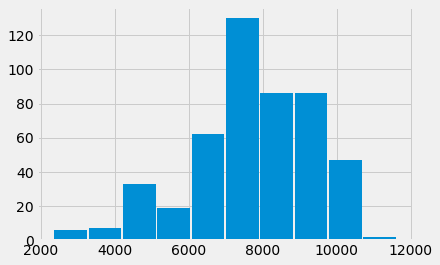

In [260]:

lib.columns = ['Date','Users']
list(lib)
lib['Date'] = pd.to_datetime(lib['Date'])

plt.hist(lib['Users'], rwidth=0.95)
#library noticed over 120 days of 7000-8000 users. Very few days saw users between 11000 and 12000


In [261]:
lib.head()

,Date,Users
0,2014-10-28,8201
1,2014-10-29,7841
2,2014-10-30,7276
3,2014-10-31,6246
4,2014-11-01,5874


In [263]:
#Adding a column to determine days
lib['Day']=lib['Date'].dt.weekday_name
lib.head() 

,Date,Users,Day
0,2014-10-28,8201,Tuesday
1,2014-10-29,7841,Wednesday
2,2014-10-30,7276,Thursday
3,2014-10-31,6246,Friday
4,2014-11-01,5874,Saturday


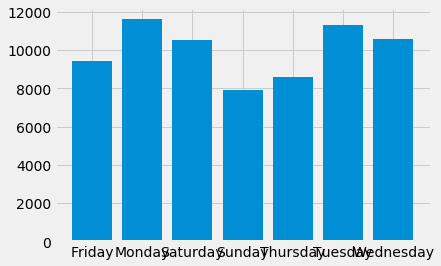

In [264]:
plt.bar(lib['Day'],lib['Users'])
plt.show()
#Maximum number of users were seen on Mondays and Tuesdays. Least number of users were seen on Sundays. 
#This can be used to manage the employees, their timings and hours to save money for the library. 

In [266]:
lib['Month'] = lib['Date'].dt.month
lib.head()

,Date,Users,Day,Month
0,2014-10-28,8201,Tuesday,10
1,2014-10-29,7841,Wednesday,10
2,2014-10-30,7276,Thursday,10
3,2014-10-31,6246,Friday,10
4,2014-11-01,5874,Saturday,11


In [267]:
import calendar 
#lib['Month_name'] = calendar.month_name(lib.Month)
lib['Month name'] = lib['Month'].apply(lambda x: calendar.month_abbr[x])
lib.head()

,Date,Users,Day,Month,Month name
0,2014-10-28,8201,Tuesday,10,Oct
1,2014-10-29,7841,Wednesday,10,Oct
2,2014-10-30,7276,Thursday,10,Oct
3,2014-10-31,6246,Friday,10,Oct
4,2014-11-01,5874,Saturday,11,Nov


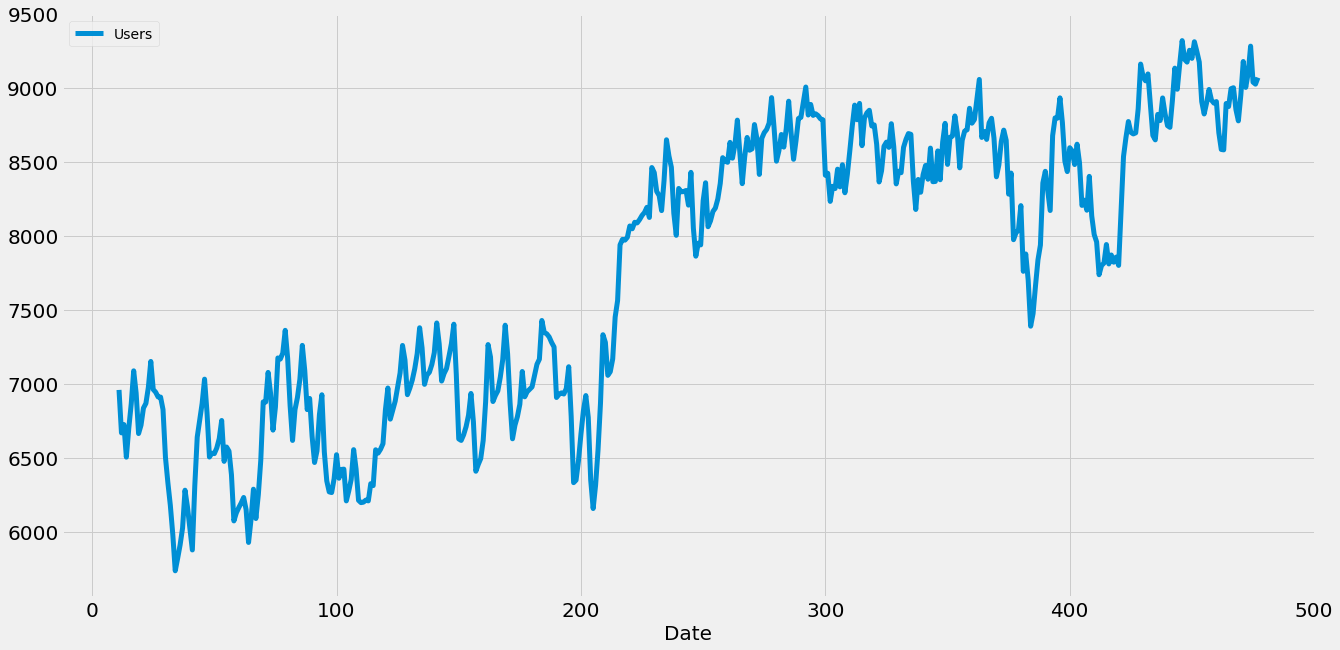

In [245]:
#plotting time series
lib_ts = lib[['Users']]
lib_ts.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);

#We can see how the number of users of library increase from 2014 to 2016 and the fluctutions in between could be because of summer or other vacations

In [246]:
#Grouping by months
lib_sum_mon=pd.DataFrame(lib.groupby('Month name').sum())
lib_sum_mon["Month"]=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
list(lib_sum_mon)




['Users', 'Month']

<Container object of 12 artists>

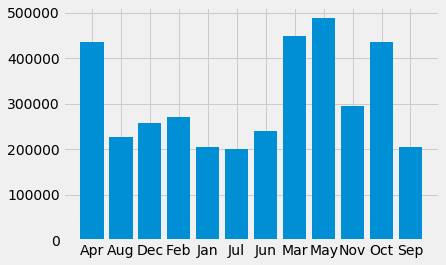

In [247]:
lib_sum_mon
plt.bar(lib_sum_mon["Month"], lib_sum_mon['Users'])

#March,April,May seem to have the most number of users. It could be due to end of academic term approaching. 
#October also sees many users. Most mid terms are in October which is why the number of users could be high. 
#July seems to have the lowest number of users. July is part of summer vacations and that could be the reason for low number of users. 
#This data can again be helpful for managing employees and library resources. 

In [248]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


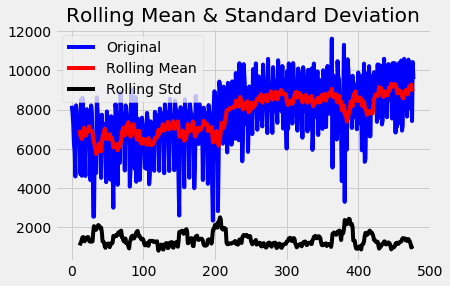

Results of Dickey-Fuller Test:
Test Statistic                  -1.720837
p-value                          0.420410
#Lags Used                      13.000000
Number of Observations Used    464.000000
Critical Value (1%)             -3.444522
Critical Value (5%)             -2.867789
Critical Value (10%)            -2.570099
dtype: float64


In [234]:
test_stationarity(lib.Users)


The timeseries is not stationary